In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [89]:
#Reading cab csv file onto dataframe
cab=pd.read_csv("Cab_Data.csv")
cab.head()

,Transaction ID,Date of Travel,Date,Year,Month,Day,Day_of_week,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000013,42371,01-02-2016,2016,1,2,7,Pink Cab,ATLANTA GA,9.04,125.20,97.632
1,10000029,42371,01-02-2016,2016,1,2,7,Pink Cab,BOSTON MA,21.34,324.21,226.204
2,10000030,42371,01-02-2016,2016,1,2,7,Pink Cab,BOSTON MA,41.30,646.06,454.300
3,10000041,42371,01-02-2016,2016,1,2,7,Pink Cab,CHICAGO IL,35.02,598.43,406.232
4,10000045,42371,01-02-2016,2016,1,2,7,Pink Cab,CHICAGO IL,3.24,48.04,33.696


In [90]:
#Cab dataframe null values
cab.isnull().values.any()

False

In [91]:
cab['my_dates'] = pd.to_datetime(cab['Date'])
cab['day_of_week'] = cab['my_dates'].dt.day_name()
cab['month'] = pd.DatetimeIndex(cab['my_dates']).month_name().str.slice(stop=3)
cab.head()

,Transaction ID,Date of Travel,Date,Year,Month,Day,Day_of_week,Company,City,KM Travelled,Price Charged,Cost of Trip,my_dates,day_of_week,month
0,10000013,42371,01-02-2016,2016,1,2,7,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-02,Saturday,Jan
1,10000029,42371,01-02-2016,2016,1,2,7,Pink Cab,BOSTON MA,21.34,324.21,226.204,2016-01-02,Saturday,Jan
2,10000030,42371,01-02-2016,2016,1,2,7,Pink Cab,BOSTON MA,41.30,646.06,454.300,2016-01-02,Saturday,Jan
3,10000041,42371,01-02-2016,2016,1,2,7,Pink Cab,CHICAGO IL,35.02,598.43,406.232,2016-01-02,Saturday,Jan
4,10000045,42371,01-02-2016,2016,1,2,7,Pink Cab,CHICAGO IL,3.24,48.04,33.696,2016-01-02,Saturday,Jan


In [92]:
#Dropping Excel serial number column after converting to date time form
cab.drop(columns=['Date of Travel','Month','Day_of_week','my_dates'],inplace=True)
cab.head()

,Transaction ID,Date,Year,Day,Company,City,KM Travelled,Price Charged,Cost of Trip,day_of_week,month
0,10000013,01-02-2016,2016,2,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Saturday,Jan
1,10000029,01-02-2016,2016,2,Pink Cab,BOSTON MA,21.34,324.21,226.204,Saturday,Jan
2,10000030,01-02-2016,2016,2,Pink Cab,BOSTON MA,41.30,646.06,454.300,Saturday,Jan
3,10000041,01-02-2016,2016,2,Pink Cab,CHICAGO IL,35.02,598.43,406.232,Saturday,Jan
4,10000045,01-02-2016,2016,2,Pink Cab,CHICAGO IL,3.24,48.04,33.696,Saturday,Jan


In [93]:
cab.duplicated(subset=None, keep='first').sum()

0

In [94]:
#Describing cab data
cab.describe(include='all')

,Transaction ID,Date,Year,Day,Company,City,KM Travelled,Price Charged,Cost of Trip,day_of_week,month
count,3.593920e+05,359392,359392.000000,359392.000000,359392,359392,359392.000000,359392.000000,359392.000000,359392,359392
unique,NaN,1095,NaN,NaN,2,19,NaN,NaN,NaN,7,12
top,NaN,01-05-2018,NaN,NaN,Yellow Cab,NEW YORK NY,NaN,NaN,NaN,Friday,Dec
freq,NaN,2022,NaN,NaN,274681,99885,NaN,NaN,NaN,81402,47007
mean,1.022076e+07,NaN,2017.045199,15.628447,NaN,NaN,22.567254,423.443311,286.190113,NaN,NaN
std,1.268058e+05,NaN,0.800239,8.827151,NaN,NaN,12.233526,274.378911,157.993661,NaN,NaN
min,1.000001e+07,NaN,2016.000000,1.000000,NaN,NaN,1.900000,15.600000,19.000000,NaN,NaN
25%,1.011081e+07,NaN,2016.000000,8.000000,NaN,NaN,12.000000,206.437500,151.200000,NaN,NaN
50%,1.022104e+07,NaN,2017.000000,16.000000,NaN,NaN,22.440000,386.360000,282.480000,NaN,NaN
75%,1.033094e+07,NaN,2018.000000,23.000000,NaN,NaN,32.960000,583.660000,413.683200,NaN,NaN


In [95]:
#Reading city csv file onto dataframe
city=pd.read_csv("City.csv")
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [96]:
#City dataframe null values
city.isnull().values.any()


False

In [97]:
city.duplicated(subset=None, keep='first').sum()

0

In [98]:
city1=city
city1 = city1.replace(',','', regex=True)
city1.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [99]:
city1['Users']=city1['Users'].astype(int)


In [100]:
city1['Population']=city1['Population'].astype(int)

In [101]:
city['Ratio']=city1['Users']/city1['Population']
city.head()

,City,Population,Users,Ratio
0,NEW YORK NY,"8,405,837","302,149",0.035945
1,CHICAGO IL,"1,955,130","164,468",0.084121
2,LOS ANGELES CA,"1,595,037","144,132",0.090363
3,MIAMI FL,"1,339,155","17,675",0.013199
4,SILICON VALLEY,"1,177,609","27,247",0.023138


In [102]:
#Describe city data
city.describe(include='all')

,City,Population,Users,Ratio
count,20,20,20,20.000000
unique,20,20,20,NaN
top,SILICON VALLEY,"631,442","144,132",NaN
freq,1,1,1,NaN
mean,NaN,NaN,NaN,0.074440
std,NaN,NaN,NaN,0.109301
min,NaN,NaN,NaN,0.006497
25%,NaN,NaN,NaN,0.013126
50%,NaN,NaN,NaN,0.025914
75%,NaN,NaN,NaN,0.075753


In [103]:
#Reading customer csv file onto dataframe
customer=pd.read_csv("Customer_ID.csv")
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [104]:
#Customer dataframe null values
customer.isnull().values.any()

False

In [105]:
customer.duplicated(subset=None, keep='first').sum()

0

In [106]:
#Describe customer data
customer.describe(include='all')

,Customer ID,Gender,Age,Income (USD/Month)
count,49171.000000,49171,49171.000000,49171.000000
unique,NaN,2,NaN,NaN
top,NaN,Male,NaN,NaN
freq,NaN,26562,NaN,NaN
mean,28398.252283,NaN,35.363121,15015.631856
std,17714.137333,NaN,12.599066,8002.208253
min,1.000000,NaN,18.000000,2000.000000
25%,12654.500000,NaN,25.000000,8289.500000
50%,27631.000000,NaN,33.000000,14656.000000
75%,43284.500000,NaN,42.000000,21035.000000


In [107]:
#Reading transaction csv file onto dataframe
transaction=pd.read_csv("Transaction_ID.csv")
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [108]:
transaction.duplicated(keep='first').sum()

0

In [109]:
#Transaction dataframe null values
transaction.isnull().values.any()

False

In [110]:
#Describe transaction data
transaction.describe(include='all')

,Transaction ID,Customer ID,Payment_Mode
count,4.400980e+05,440098.000000,440098
unique,NaN,NaN,2
top,NaN,NaN,Card
freq,NaN,NaN,263991
mean,1.022006e+07,23619.513120,NaN
std,1.270455e+05,21195.549816,NaN
min,1.000001e+07,1.000000,NaN
25%,1.011004e+07,3530.000000,NaN
50%,1.022006e+07,15168.000000,NaN
75%,1.033008e+07,43884.000000,NaN


In [111]:
#merging cab and transaction datasets
df = pd.merge(cab, transaction, on='Transaction ID')
df.head()

,Transaction ID,Date,Year,Day,Company,City,KM Travelled,Price Charged,Cost of Trip,day_of_week,month,Customer ID,Payment_Mode
0,10000013,01-02-2016,2016,2,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Saturday,Jan,28712,Cash
1,10000029,01-02-2016,2016,2,Pink Cab,BOSTON MA,21.34,324.21,226.204,Saturday,Jan,58925,Card
2,10000030,01-02-2016,2016,2,Pink Cab,BOSTON MA,41.30,646.06,454.300,Saturday,Jan,58551,Card
3,10000041,01-02-2016,2016,2,Pink Cab,CHICAGO IL,35.02,598.43,406.232,Saturday,Jan,4289,Card
4,10000045,01-02-2016,2016,2,Pink Cab,CHICAGO IL,3.24,48.04,33.696,Saturday,Jan,5734,Card


In [112]:
#merging the city dataset into main
df = pd.merge(df, city, on='City')
df.head()

,Transaction ID,Date,Year,Day,Company,City,KM Travelled,Price Charged,Cost of Trip,day_of_week,month,Customer ID,Payment_Mode,Population,Users,Ratio
0,10000013,01-02-2016,2016,2,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,Saturday,Jan,28712,Cash,"814,885","24,701",0.030312
1,10000384,01-02-2016,2016,2,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,Saturday,Jan,27602,Card,"814,885","24,701",0.030312
2,10000392,01-02-2016,2016,2,Yellow Cab,ATLANTA GA,27.37,976.37,394.1280,Saturday,Jan,29651,Card,"814,885","24,701",0.030312
3,10000398,01-02-2016,2016,2,Yellow Cab,ATLANTA GA,38.85,1430.64,545.4540,Saturday,Jan,29558,Cash,"814,885","24,701",0.030312
4,10000402,01-02-2016,2016,2,Yellow Cab,ATLANTA GA,21.80,709.85,287.7600,Saturday,Jan,29559,Card,"814,885","24,701",0.030312


In [113]:
#merging customer dataset with the main dataframe
df = pd.merge(df, customer, on='Customer ID')
df.head()

,Transaction ID,Date,Year,Day,Company,City,KM Travelled,Price Charged,Cost of Trip,day_of_week,month,Customer ID,Payment_Mode,Population,Users,Ratio,Gender,Age,Income (USD/Month)
0,10000013,01-02-2016,2016,2,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,Saturday,Jan,28712,Cash,"814,885","24,701",0.030312,Male,53,11242
1,10079404,9/21/2016,2016,21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,Wednesday,Sep,28712,Card,"814,885","24,701",0.030312,Male,53,11242
2,10186994,6/23/2017,2017,23,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,Friday,Jun,28712,Card,"814,885","24,701",0.030312,Male,53,11242
3,10320493,4/21/2018,2018,21,Yellow Cab,ATLANTA GA,19.38,326.35,272.0952,Saturday,Apr,28712,Cash,"814,885","24,701",0.030312,Male,53,11242
4,10000384,01-02-2016,2016,2,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,Saturday,Jan,27602,Card,"814,885","24,701",0.030312,Male,23,8542


In [114]:
df.duplicated(subset=None, keep='first').sum()

0

In [115]:
#Summary Statistics to understand the data

In [116]:
df[['Price Charged','KM Travelled','Cost of Trip']].mean()

Price Charged    423.443311
KM Travelled      22.567254
Cost of Trip     286.190113
dtype: float64

In [117]:
df[['Price Charged','KM Travelled','Cost of Trip']].median()

Price Charged    386.36
KM Travelled      22.44
Cost of Trip     282.48
dtype: float64

In [118]:
df.groupby('Gender').mean()

,Transaction ID,Year,Day,KM Travelled,Price Charged,Cost of Trip,Customer ID,Ratio,Age,Income (USD/Month)
Gender,,,,,,,,,,
Female,1.022309e+07,2017.057024,15.633138,22.586388,419.419578,286.099599,20044.356789,0.106858,35.287608,15057.968954
Male,1.021902e+07,2017.036384,15.624951,22.552992,426.442469,286.257579,18556.074231,0.106559,35.373300,15042.005799


In [119]:
df.groupby('day_of_week').mean()

,Transaction ID,Year,Day,KM Travelled,Price Charged,Cost of Trip,Customer ID,Ratio,Age,Income (USD/Month)
day_of_week,,,,,,,,,,
Friday,1.025561e+07,2017.279563,15.641336,22.598703,432.462983,286.483774,19192.705339,0.106892,35.333874,15087.696506
Monday,1.022097e+07,2017.058681,15.601473,22.495480,403.387746,285.523370,19017.073646,0.105948,35.334465,15044.725023
Saturday,1.022207e+07,2017.043868,15.653501,22.555820,430.247719,286.091494,19211.910026,0.106846,35.353798,15028.426388
Sunday,1.017855e+07,2016.765609,15.573062,22.626701,443.945617,286.939832,19168.743280,0.106532,35.267558,15018.389120
Thursday,1.022066e+07,2017.045337,15.473973,22.418507,399.578100,284.084930,19358.538984,0.107627,35.370418,15056.450172
Tuesday,1.022210e+07,2017.059712,15.779672,22.744151,406.345624,288.503516,19089.152813,0.105765,35.358406,15062.831882
Wednesday,1.022034e+07,2017.040031,15.738456,22.464909,401.764597,285.044721,19243.440868,0.106479,35.397615,15047.876553


In [120]:
df.groupby('Year').mean()

,Transaction ID,Day,KM Travelled,Price Charged,Cost of Trip,Customer ID,Ratio,Age,Income (USD/Month)
Year,,,,,,,,,
2016,1.006677e+07,15.917871,22.582095,432.259082,286.520614,19320.383073,0.107363,35.363514,15055.407020
2017,1.021075e+07,15.559809,22.571804,431.075711,286.264934,19096.023243,0.106344,35.308233,15066.674080
2018,1.036492e+07,15.448459,22.549632,407.848519,285.825244,19179.302048,0.106456,35.343031,15024.538584


In [121]:
df.groupby('month').mean()

,Transaction ID,Year,Day,KM Travelled,Price Charged,Cost of Trip,Customer ID,Ratio,Age,Income (USD/Month)
month,,,,,,,,,,
Apr,1.017223e+07,2017.017496,15.765699,22.567053,443.488394,288.530805,21186.366614,0.119752,35.348325,14972.229542
Aug,1.022066e+07,2017.055486,16.145867,22.545362,389.051543,285.468802,18847.153050,0.103648,35.366057,15076.827060
Dec,1.028008e+07,2017.025911,15.718553,22.578960,417.915115,285.915103,17831.554045,0.098971,35.278788,15016.483524
Feb,1.015463e+07,2017.016715,14.784345,22.526383,464.421420,288.094329,20650.284645,0.119357,35.359644,15100.672366
Jan,1.019509e+07,2017.245706,12.551221,22.688692,450.316167,288.648335,19885.782127,0.110179,35.396349,15047.502503
Jul,1.020031e+07,2017.000036,16.802500,22.645335,401.485483,287.182593,19483.278111,0.107095,35.283459,14944.427952
Jun,1.019671e+07,2017.049488,15.604702,22.593332,440.624966,286.331530,19905.427386,0.110449,35.345122,15017.695140
Mar,1.016860e+07,2017.054052,16.298670,22.666627,448.783756,289.386573,20623.085974,0.117974,35.413471,15104.801441
May,1.018164e+07,2017.015949,16.153369,22.490692,461.592726,286.403600,20230.297329,0.114645,35.342686,15034.848530


In [122]:
df.groupby('City').mean()

,Transaction ID,Year,Day,KM Travelled,Price Charged,Cost of Trip,Customer ID,Ratio,Age,Income (USD/Month)
City,,,,,,,,,,
ATLANTA GA,1.022059e+07,2017.049226,15.680296,22.316231,394.368363,282.891205,28493.319174,0.030312,35.310308,14933.150986
AUSTIN TX,1.023061e+07,2017.045139,15.735090,22.305413,383.403288,275.825465,34518.843750,0.021447,35.336601,14696.495711
BOSTON MA,1.021653e+07,2017.037620,15.578034,22.578074,348.907296,289.338413,58499.983969,0.321411,35.177354,15128.563317
CHICAGO IL,1.021698e+07,2017.049307,15.604168,22.634956,350.398561,290.578457,4505.538190,0.084121,35.689978,15101.718269
DALLAS TX,1.021894e+07,2017.049879,15.688043,22.485685,447.830969,286.974012,25504.808465,0.023499,35.681345,14846.508194
DENVER CO,1.022261e+07,2017.057516,15.613856,22.449608,382.361179,278.417386,31500.812810,0.016468,35.148235,14975.655163
LOS ANGELES CA,1.021800e+07,2017.043179,15.606770,22.666410,370.487465,278.640013,7502.028293,0.090363,35.659151,15064.550455
MIAMI FL,1.023684e+07,2017.057329,15.580570,22.531480,399.773040,282.279820,10509.906879,0.013199,35.897583,14984.887202
NASHVILLE TN,1.022195e+07,2017.048837,15.768439,22.699249,318.640575,268.962097,55481.731894,0.028329,34.263455,14734.359801


In [123]:
df.groupby('Payment_Mode').mean()

,Transaction ID,Year,Day,KM Travelled,Price Charged,Cost of Trip,Customer ID,Ratio,Age,Income (USD/Month)
Payment_Mode,,,,,,,,,,
Card,1.022089e+07,2017.045767,15.629074,22.574909,423.392533,286.306072,19181.930660,0.106604,35.348207,15054.460906
Cash,1.022057e+07,2017.044347,15.627509,22.555789,423.519362,286.016438,19206.212137,0.106810,35.319478,15040.378836


In [124]:
df.groupby(["Gender", "City"])["Price Charged"].mean()

Gender  City          
Female  ATLANTA GA        393.800032
        AUSTIN TX         382.000446
        BOSTON MA         352.056163
        CHICAGO IL        349.914043
        DALLAS TX         450.601058
        DENVER CO         384.234135
        LOS ANGELES CA    369.222589
        MIAMI FL          400.357212
        NASHVILLE TN      318.449643
        NEW YORK NY       566.805121
        ORANGE COUNTY     390.940585
        PHOENIX AZ        363.837039
        PITTSBURGH PA     327.186443
        SACRAMENTO CA     324.429647
        SAN DIEGO CA      348.273024
        SEATTLE WA        356.500924
        SILICON VALLEY    435.084996
        TUCSON AZ         352.030646
        WASHINGTON DC     375.621409
Male    ATLANTA GA        394.920532
        AUSTIN TX         384.748872
        BOSTON MA         346.399670
        CHICAGO IL        350.706139
        DALLAS TX         445.277116
        DENVER CO         380.606765
        LOS ANGELES CA    371.452650
        MIAMI F

In [125]:
df.groupby(["Gender", "Company"])["Price Charged"].mean()

Gender  Company   
Female  Pink Cab      310.624823
        Yellow Cab    454.571538
Male    Pink Cab      310.940547
        Yellow Cab    460.821326
Name: Price Charged, dtype: float64

In [126]:
df.groupby(["Gender", "Company"])["Cost of Trip"].mean()

Gender  Company   
Female  Pink Cab      248.444121
        Yellow Cab    298.266214
Male    Pink Cab      247.914237
        Yellow Cab    297.670378
Name: Cost of Trip, dtype: float64

In [127]:
df.groupby(["Gender","Company"])["Price Charged"].mean()

Gender  Company   
Female  Pink Cab      310.624823
        Yellow Cab    454.571538
Male    Pink Cab      310.940547
        Yellow Cab    460.821326
Name: Price Charged, dtype: float64

In [128]:
df.groupby(["Gender", "Company"])["KM Travelled"].mean()

Gender  Company   
Female  Pink Cab      22.583545
        Yellow Cab    22.587307
Male    Pink Cab      22.541166
        Yellow Cab    22.556512
Name: KM Travelled, dtype: float64

In [129]:
df["City"].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

In [130]:
df["Gender"].value_counts()

Male      205912
Female    153480
Name: Gender, dtype: int64

In [131]:
df.groupby("Gender")["Company"].value_counts()

Gender  Company   
Female  Yellow Cab    116000
        Pink Cab       37480
Male    Yellow Cab    158681
        Pink Cab       47231
Name: Company, dtype: int64

In [132]:
df["Payment_Mode"].value_counts()

Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64

In [133]:
df["Company"].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

In [134]:
df.groupby("Gender")["City"].value_counts()

Gender  City          
Female  NEW YORK NY       39551
        CHICAGO IL        21988
        LOS ANGELES CA    20789
        WASHINGTON DC     18683
        BOSTON MA         13163
        SAN DIEGO CA       9622
        SILICON VALLEY     4231
        ATLANTA GA         3724
        SEATTLE WA         3724
        DALLAS TX          3366
        MIAMI FL           3217
        AUSTIN TX          2397
        ORANGE COUNTY      1948
        DENVER CO          1850
        NASHVILLE TN       1430
        SACRAMENTO CA      1191
        PHOENIX AZ         1020
        TUCSON AZ           914
        PITTSBURGH PA       672
Male    NEW YORK NY       60334
        CHICAGO IL        34637
        LOS ANGELES CA    27244
        WASHINGTON DC     25054
        BOSTON MA         16529
        SAN DIEGO CA      10866
        SILICON VALLEY     4288
        SEATTLE WA         4273
        ATLANTA GA         3833
        DALLAS TX          3651
        MIAMI FL           3237
        AUSTIN TX

In [135]:
df.groupby("Company")["City"].value_counts()

Company     City          
Pink Cab    LOS ANGELES CA    19865
            NEW YORK NY       13967
            SAN DIEGO CA      10672
            CHICAGO IL         9361
            BOSTON MA          5186
            SILICON VALLEY     3797
            WASHINGTON DC      3692
            SEATTLE WA         2732
            MIAMI FL           2002
            AUSTIN TX          1868
            NASHVILLE TN       1841
            ATLANTA GA         1762
            ORANGE COUNTY      1513
            DENVER CO          1394
            DALLAS TX          1380
            SACRAMENTO CA      1334
            PHOENIX AZ          864
            TUCSON AZ           799
            PITTSBURGH PA       682
Yellow Cab  NEW YORK NY       85918
            CHICAGO IL        47264
            WASHINGTON DC     40045
            LOS ANGELES CA    28168
            BOSTON MA         24506
            SAN DIEGO CA       9816
            ATLANTA GA         5795
            DALLAS TX          5637
 

In [136]:
df.groupby("Gender")["Company"].value_counts()

Gender  Company   
Female  Yellow Cab    116000
        Pink Cab       37480
Male    Yellow Cab    158681
        Pink Cab       47231
Name: Company, dtype: int64

In [137]:
df.groupby("Gender")["Payment_Mode"].value_counts()

Gender  Payment_Mode
Female  Card             92025
        Cash             61455
Male    Card            123479
        Cash             82433
Name: Payment_Mode, dtype: int64

In [138]:
#Profit statistics
df["Profit"]=df["Price Charged"]-df["Cost of Trip"]
df["Profit/km"]=df["Profit"]/df["KM Travelled"]
df.head()

,Transaction ID,Date,Year,Day,Company,City,KM Travelled,Price Charged,Cost of Trip,day_of_week,...,Customer ID,Payment_Mode,Population,Users,Ratio,Gender,Age,Income (USD/Month),Profit,Profit/km
0,10000013,01-02-2016,2016,2,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,Saturday,...,28712,Cash,"814,885","24,701",0.030312,Male,53,11242,27.5680,3.049558
1,10079404,9/21/2016,2016,21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,Wednesday,...,28712,Card,"814,885","24,701",0.030312,Male,53,11242,210.0920,5.305354
2,10186994,6/23/2017,2017,23,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,Friday,...,28712,Card,"814,885","24,701",0.030312,Male,53,11242,118.9736,6.540605
3,10320493,4/21/2018,2018,21,Yellow Cab,ATLANTA GA,19.38,326.35,272.0952,Saturday,...,28712,Cash,"814,885","24,701",0.030312,Male,53,11242,54.2548,2.799525
4,10000384,01-02-2016,2016,2,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,Saturday,...,27602,Card,"814,885","24,701",0.030312,Male,23,8542,877.0076,25.847557


In [139]:
#saving merged dataframe as csv file
df.to_csv("Cab_data_complete.csv", index="False")

In [140]:
df.groupby(["Gender", "Company"])["Profit/km"].mean()

Gender  Company   
Female  Pink Cab      2.747246
        Yellow Cab    6.939591
Male    Pink Cab      2.787891
        Yellow Cab    7.226797
Name: Profit/km, dtype: float64

In [141]:
df.groupby(["Payment_Mode", "Company"])["Profit/km"].mean()

Payment_Mode  Company   
Card          Pink Cab      2.765957
              Yellow Cab    7.093263
Cash          Pink Cab      2.775802
              Yellow Cab    7.123868
Name: Profit/km, dtype: float64

In [142]:
df.groupby(["month", "Company"])["Profit/km"].mean()

month  Company   
Apr    Pink Cab      2.673542
       Yellow Cab    7.874125
Aug    Pink Cab      2.226676
       Yellow Cab    5.367933
Dec    Pink Cab      3.923307
       Yellow Cab    6.495423
Feb    Pink Cab      3.313398
       Yellow Cab    8.822241
Jan    Pink Cab      3.404192
       Yellow Cab    8.167712
Jul    Pink Cab      2.038918
       Yellow Cab    5.991807
Jun    Pink Cab      1.735244
       Yellow Cab    8.436062
Mar    Pink Cab      3.059808
       Yellow Cab    8.048030
May    Pink Cab      1.497252
       Yellow Cab    9.461404
Nov    Pink Cab      3.263209
       Yellow Cab    6.416993
Oct    Pink Cab      2.925727
       Yellow Cab    6.232133
Sep    Pink Cab      2.264885
       Yellow Cab    6.756176
Name: Profit/km, dtype: float64

In [143]:
df.groupby(["day_of_week", "Company"])["Profit/km"].mean()

day_of_week  Company   
Friday       Pink Cab      3.063829
             Yellow Cab    7.519849
Monday       Pink Cab      2.119208
             Yellow Cab    6.191490
Saturday     Pink Cab      3.000838
             Yellow Cab    7.435303
Sunday       Pink Cab      3.390040
             Yellow Cab    8.032074
Thursday     Pink Cab      2.112611
             Yellow Cab    6.107291
Tuesday      Pink Cab      2.115523
             Yellow Cab    6.131356
Wednesday    Pink Cab      2.118943
             Yellow Cab    6.135966
Name: Profit/km, dtype: float64

In [144]:
df.groupby("City")["Ratio"].mean()

City
ATLANTA GA        0.030312
AUSTIN TX         0.021447
BOSTON MA         0.321411
CHICAGO IL        0.084121
DALLAS TX         0.023499
DENVER CO         0.016468
LOS ANGELES CA    0.090363
MIAMI FL          0.013199
NASHVILLE TN      0.028329
NEW YORK NY       0.035945
ORANGE COUNTY     0.012613
PHOENIX AZ        0.006497
PITTSBURGH PA     0.006720
SACRAMENTO CA     0.012906
SAN DIEGO CA      0.072964
SEATTLE WA        0.037338
SILICON VALLEY    0.023138
TUCSON AZ         0.009046
WASHINGTON DC     0.303207
Name: Ratio, dtype: float64

In [145]:
df.groupby("Company")["day_of_week"].value_counts()

Company     day_of_week
Pink Cab    Friday         19249
            Saturday       18253
            Sunday         16475
            Thursday        9549
            Tuesday         7077
            Wednesday       7076
            Monday          7032
Yellow Cab  Friday         62153
            Saturday       59981
            Sunday         53835
            Thursday       30198
            Wednesday      23026
            Tuesday        22783
            Monday         22705
Name: day_of_week, dtype: int64

In [146]:
df.groupby("Company")["month"].value_counts()

Company     month
Pink Cab    Dec      11568
            Nov      11005
            Oct      10576
            Sep       9658
            Aug       7739
            Jul       6590
            Jun       5877
            Jan       5057
            May       4960
            Mar       4223
            Apr       4083
            Feb       3375
Yellow Cab  Dec      35439
            Nov      31695
            Oct      30276
            Sep      27201
            Aug      23584
            Jul      21086
            Jun      18836
            May      18741
            Jan      18117
            Mar      17423
            Apr      17351
            Feb      14932
Name: month, dtype: int64

In [147]:
df.groupby("Company")["Year"].value_counts()


Company     Year
Pink Cab    2017    30321
            2018    29310
            2016    25080
Yellow Cab  2017    98189
            2018    94253
            2016    82239
Name: Year, dtype: int64

In [148]:
#income bins
df.loc[df['Income (USD/Month)'] <= 10000, 'Income'] = 'Poor' 
df.loc[(df['Income (USD/Month)'] > 10000) & (df['Income (USD/Month)'] <= 25000), 'Income'] = 'Average'
df.loc[df['Income (USD/Month)'] > 25000, 'Income'] = 'Rich' 
df.head()

,Transaction ID,Date,Year,Day,Company,City,KM Travelled,Price Charged,Cost of Trip,day_of_week,...,Payment_Mode,Population,Users,Ratio,Gender,Age,Income (USD/Month),Profit,Profit/km,Income
0,10000013,01-02-2016,2016,2,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,Saturday,...,Cash,"814,885","24,701",0.030312,Male,53,11242,27.5680,3.049558,Average
1,10079404,9/21/2016,2016,21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,Wednesday,...,Card,"814,885","24,701",0.030312,Male,53,11242,210.0920,5.305354,Average
2,10186994,6/23/2017,2017,23,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,Friday,...,Card,"814,885","24,701",0.030312,Male,53,11242,118.9736,6.540605,Average
3,10320493,4/21/2018,2018,21,Yellow Cab,ATLANTA GA,19.38,326.35,272.0952,Saturday,...,Cash,"814,885","24,701",0.030312,Male,53,11242,54.2548,2.799525,Average
4,10000384,01-02-2016,2016,2,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,Saturday,...,Card,"814,885","24,701",0.030312,Male,23,8542,877.0076,25.847557,Poor


In [149]:
df.groupby(["Income", "Company"])["Profit/km"].mean()

Income   Company   
Average  Pink Cab      2.782590
         Yellow Cab    7.176518
Poor     Pink Cab      2.756045
         Yellow Cab    6.979409
Rich     Pink Cab      2.735710
         Yellow Cab    7.074831
Name: Profit/km, dtype: float64

In [150]:
df.groupby(["Income", "Company"])["KM Travelled"].mean()

Income   Company   
Average  Pink Cab      22.520354
         Yellow Cab    22.582032
Poor     Pink Cab      22.603162
         Yellow Cab    22.550926
Rich     Pink Cab      22.666596
         Yellow Cab    22.551663
Name: KM Travelled, dtype: float64

In [155]:
df.loc[df['Age'] <= 18, 'Age Group'] = 'Child' 
df.loc[(df['Age'] > 18) & (df['Age'] <= 40), 'Age Group'] = 'Adult'
df.loc[df['Age'] > 40 , 'Age Group'] = 'Elder'
df.head()

,Transaction ID,Date,Year,Day,Company,City,KM Travelled,Price Charged,Cost of Trip,day_of_week,...,Population,Users,Ratio,Gender,Age,Income (USD/Month),Profit,Profit/km,Income,Age Group
0,10000013,01-02-2016,2016,2,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,Saturday,...,"814,885","24,701",0.030312,Male,53,11242,27.5680,3.049558,Average,Elder
1,10079404,9/21/2016,2016,21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,Wednesday,...,"814,885","24,701",0.030312,Male,53,11242,210.0920,5.305354,Average,Elder
2,10186994,6/23/2017,2017,23,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,Friday,...,"814,885","24,701",0.030312,Male,53,11242,118.9736,6.540605,Average,Elder
3,10320493,4/21/2018,2018,21,Yellow Cab,ATLANTA GA,19.38,326.35,272.0952,Saturday,...,"814,885","24,701",0.030312,Male,53,11242,54.2548,2.799525,Average,Elder
4,10000384,01-02-2016,2016,2,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,Saturday,...,"814,885","24,701",0.030312,Male,23,8542,877.0076,25.847557,Poor,Adult


In [156]:
df.groupby(["Age Group", "Company"])["Profit/km"].mean()

Age Group  Company   
Adult      Pink Cab      2.774854
           Yellow Cab    7.105593
Child      Pink Cab      2.786969
           Yellow Cab    7.222887
Elder      Pink Cab      2.754881
           Yellow Cab    7.092265
Name: Profit/km, dtype: float64

In [71]:
dfa=df.groupby("Customer ID")["Company"].value_counts()
dfa.head()

Customer ID  Company   
1            Yellow Cab    25
             Pink Cab       4
2            Yellow Cab    36
             Pink Cab       4
3            Yellow Cab    40
Name: Company, dtype: int64

In [73]:
dfa.to_frame()
dfa.groupby("Company").mean()

Company
Pink Cab      2.620198
Yellow Cab    6.884926
Name: Company, dtype: float64

In [61]:
#Data Visualization
#Scatter Plots

In [65]:
#Selecting a random sample for scatterplots
df1=df.sample(n = 50000)

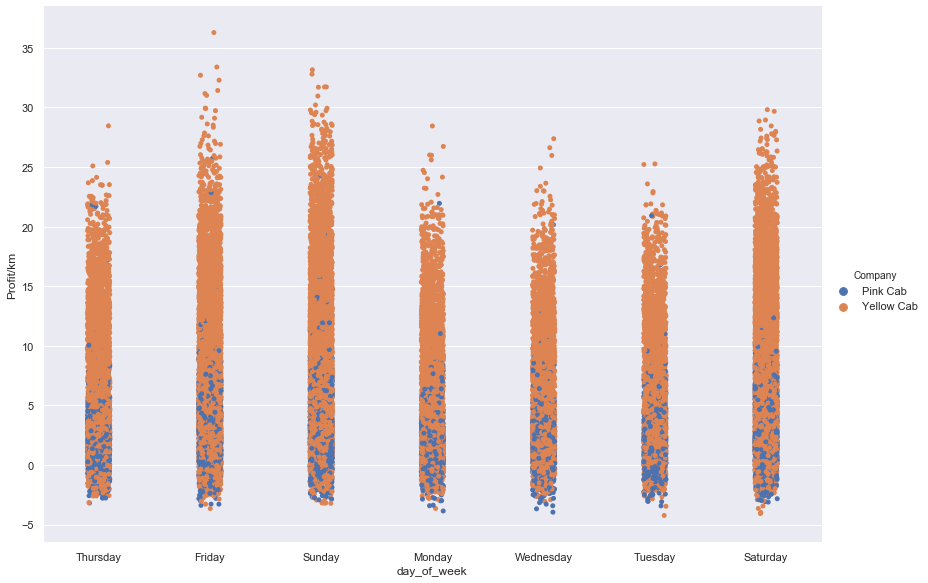

In [66]:

sns.catplot(x="day_of_week", y="Profit/km",hue="Company",height=8.27, aspect=11.7/8.27, data=df1)

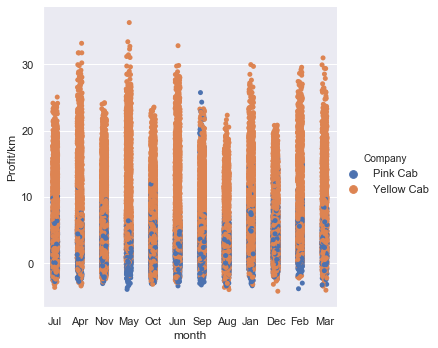

In [67]:
sns.catplot(x="month", y="Profit/km", hue="Company", data=df1)

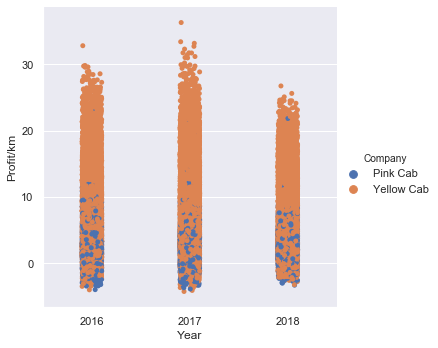

In [68]:
sns.catplot(x="Year", y="Profit/km",hue="Company", data=df1)

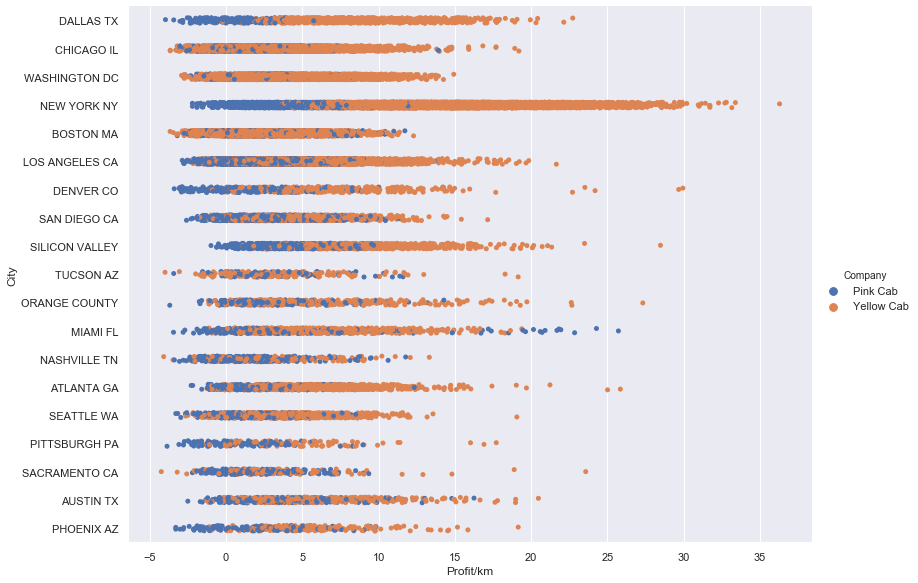

In [69]:
sns.catplot(x="Profit/km", y="City",hue="Company",height=8.27, aspect=11.7/8.27, data=df1)

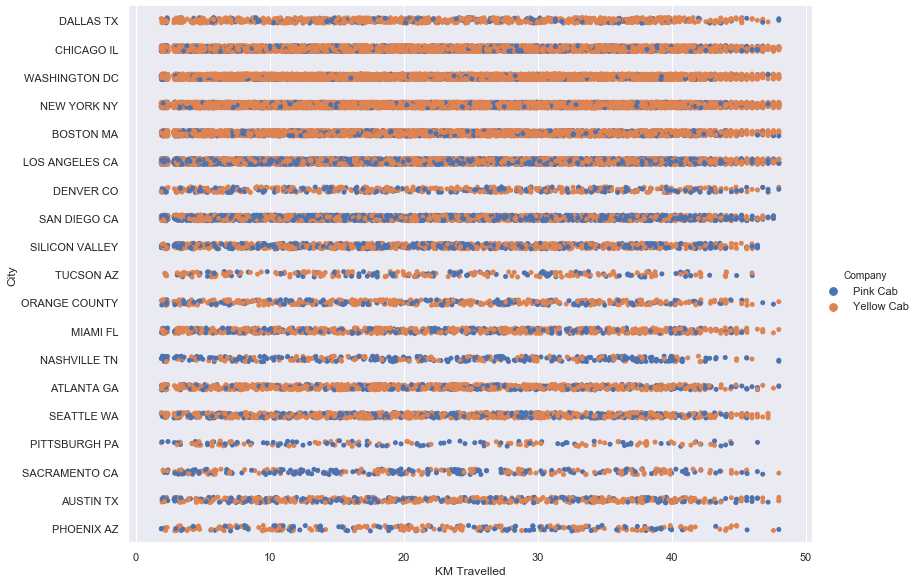

In [71]:
sns.catplot(x="KM Travelled", y="City",hue="Company",height=8.27, aspect=11.7/8.27, data=df1)

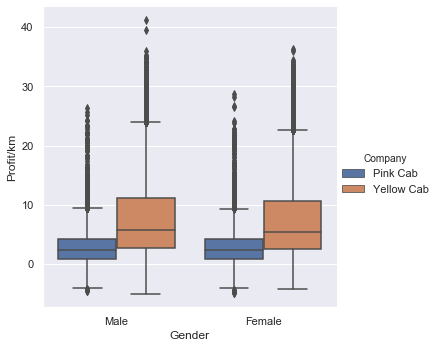

In [75]:
sns.catplot(x="Gender", y="Profit/km", kind="box",hue="Company", data=df)

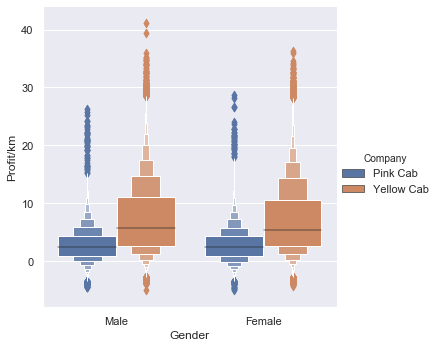

In [77]:
sns.catplot(x="Gender", y="Profit/km", kind="boxen",hue="Company", data=df)

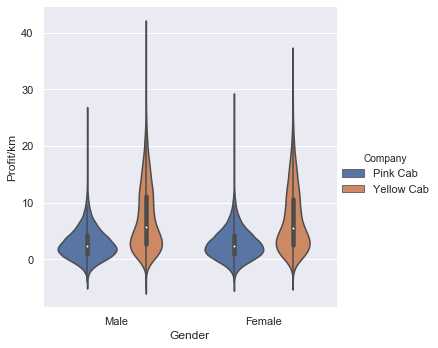

In [78]:
sns.catplot(x="Gender", y="Profit/km", kind="violin",hue="Company", data=df)

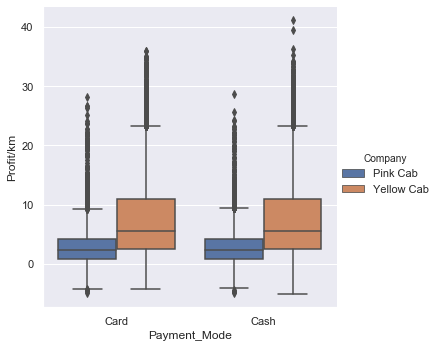

In [79]:
sns.catplot(x="Payment_Mode", y="Profit/km", kind="box",hue="Company", data=df)

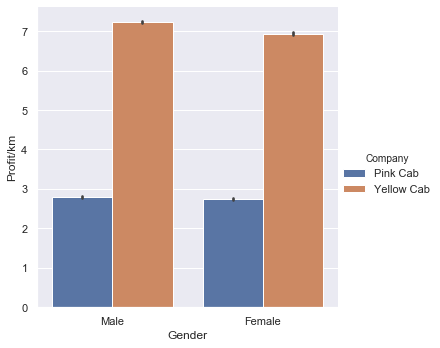

In [80]:
sns.catplot(x="Gender", y="Profit/km", kind="bar",hue="Company", data=df)

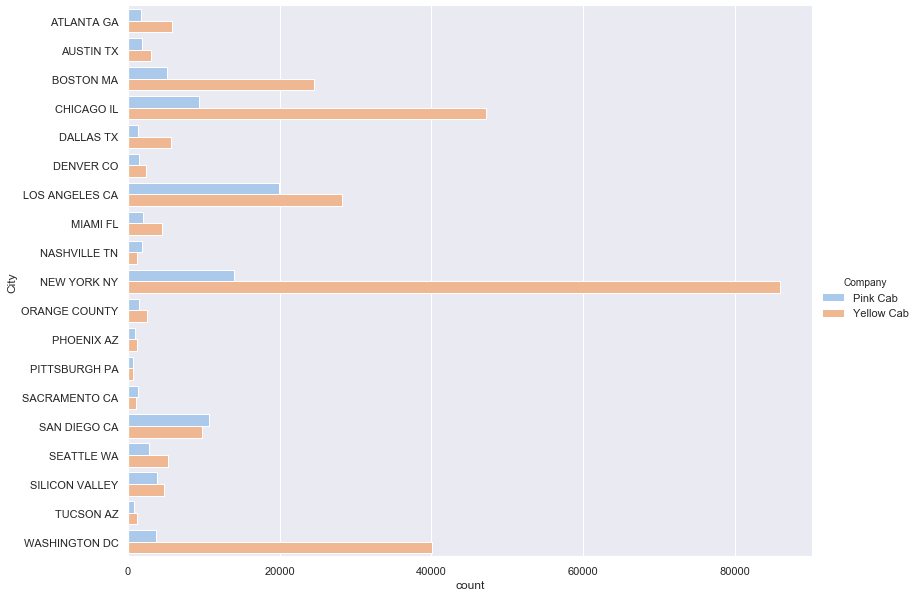

In [87]:
sns.catplot(y="City", kind="count", palette="pastel",hue="Company",height=8.27, aspect=11.7/8.27, data=df)

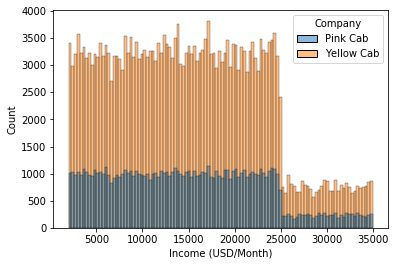

In [58]:
sns.histplot(data=df, x="Income (USD/Month)",hue="Company",binwidth=300)

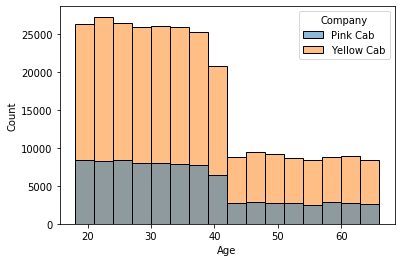

In [57]:
sns.histplot(data=df, x="Age",hue="Company",binwidth=3)

In [70]:
df1=df.groupby(["Customer ID", "Company"])["Profit/km"].mean()
df1.head()

Customer ID  Company   
1            Pink Cab       7.209920
             Yellow Cab    13.421666
2            Pink Cab       5.662595
             Yellow Cab    13.331309
3            Pink Cab       3.549862
Name: Profit/km, dtype: float64

In [75]:
df.head()

,Transaction ID,Date,Year,Day,Company,City,KM Travelled,Price Charged,Cost of Trip,day_of_week,month,Customer ID,Payment_Mode,Population,Users,Gender,Age,Income (USD/Month),Profit,Profit/km
0,10000011,1/8/2016,2016,8,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Friday,Jan,29290,Card,"814,885","24,701",Male,28,10813,57.3150,1.882266
1,10351127,7/21/2018,2018,21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Saturday,Jul,29290,Cash,"814,885","24,701",Male,28,10813,281.2772,10.739870
2,10412921,11/23/2018,2018,23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Friday,Nov,29290,Card,"814,885","24,701",Male,28,10813,194.6480,4.574571
3,10000012,1/6/2016,2016,6,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Wednesday,Jan,27703,Card,"814,885","24,701",Male,27,9237,23.6660,0.826904
4,10320494,4/21/2018,2018,21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Saturday,Apr,27703,Card,"814,885","24,701",Male,27,9237,253.9808,6.981330
